In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
import joblib

In [3]:
import pandas as pd

# Load dataset
data = pd.read_csv("synthetic_liver_disease_data.csv")

# Display basic information
print("Dataset Shape:", data.shape)
print("\nFeature Information:")
print(data.info())

# Display first few rows
data.head()


Dataset Shape: (1000, 16)

Feature Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           1000 non-null   int64  
 1   Sex           1000 non-null   object 
 2   Stage         1000 non-null   object 
 3   Albumin       1000 non-null   float64
 4   Bilirubin     1000 non-null   float64
 5   ALT           1000 non-null   float64
 6   AST           1000 non-null   float64
 7   ALP           1000 non-null   float64
 8   INR           1000 non-null   float64
 9   Platelets     1000 non-null   float64
 10  Sodium        1000 non-null   float64
 11  Creatinine    1000 non-null   float64
 12  Ascites       1000 non-null   int64  
 13  Hepatomegaly  1000 non-null   int64  
 14  Spiders       1000 non-null   int64  
 15  Edema         1000 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 125.1+ KB
None


,Age,Sex,Stage,Albumin,Bilirubin,ALT,AST,ALP,INR,Platelets,Sodium,Creatinine,Ascites,Hepatomegaly,Spiders,Edema
0,62,M,Stage 3,4.039874,2.322060,125.447655,119.036758,218.266607,1.190166,128.217333,133.574624,1.312539,1,1,0,0
1,52,F,Stage 1,4.294853,0.816072,131.030071,138.177475,137.282780,1.103945,140.600275,141.011849,0.896678,0,0,0,0
2,64,M,Stage 1,3.869009,1.137112,281.582020,57.167889,115.047116,0.956409,187.947200,136.745008,0.878836,0,0,0,0
3,77,F,Stage 1,4.412944,1.002015,140.988001,106.263779,101.101004,0.968418,176.837306,141.255818,0.809273,0,0,0,0
4,51,M,Stage 4,2.287464,4.309162,15.000000,208.588150,125.835359,2.607472,119.458567,126.254590,1.600336,1,1,0,1


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate features and target
X = data.drop("Stage", axis=1)
y = data["Stage"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identify numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

print("Preprocessing pipeline created successfully.")


Preprocessing pipeline created successfully.


In [5]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(random_state=42, probability=True)
}

# Train and evaluate each model
best_accuracy = 0
best_classifier = None
best_pipeline = None

for name, model in models.items():
    pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_classifier = name
        best_pipeline = pipeline

print(f"\nBest classifier: {best_classifier} with accuracy: {best_accuracy:.4f}")


Random Forest Accuracy: 0.8850
Gradient Boosting Accuracy: 0.8900
SVM Accuracy: 0.9000

Best classifier: SVM with accuracy: 0.9000



Classification Report:
              precision    recall  f1-score   support

     Stage 1       0.84      0.93      0.88        61
     Stage 2       0.88      0.79      0.84        58
     Stage 3       0.96      0.94      0.95        53
     Stage 4       0.96      0.96      0.96        28

    accuracy                           0.90       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.90      0.90      0.90       200



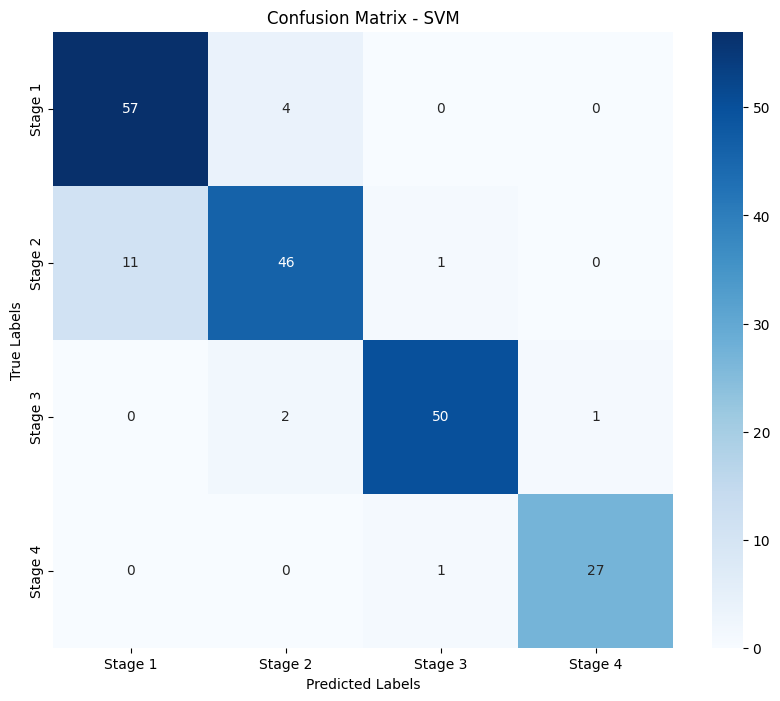

In [6]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate classification report
y_pred = best_pipeline.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix - {best_classifier}')
plt.show()


In [7]:
# Feature importance (for RF and GB models)
if best_classifier in ["Random Forest", "Gradient Boosting"]:
    cat_features_after_onehot = []
    for feature in categorical_features:
        categories = best_pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].categories_[0]
        for category in categories:
            cat_features_after_onehot.append(f"{feature}_{category}")

    # All feature names
    feature_names = list(numeric_features) + cat_features_after_onehot
    importances = best_pipeline.named_steps['classifier'].feature_importances_

    # Sort feature importances in descending order
    indices = np.argsort(importances)[::-1]

    # Limit to top 15 features
    top_n = min(15, len(feature_names))

    plt.figure(figsize=(12, 8))
    plt.title(f'Top {top_n} Feature Importances - {best_classifier}')
    plt.bar(range(top_n), importances[indices][:top_n], align="center")
    plt.xticks(range(top_n), [feature_names[i] for i in indices][:top_n], rotation=90)
    plt.tight_layout()
    plt.show()


In [8]:
import joblib

# Save the model
joblib.dump(best_pipeline, "liver_disease_staging_model.pkl")
print("Best model saved as 'liver_disease_staging_model.pkl'")


Best model saved as 'liver_disease_staging_model.pkl'


In [11]:
def predict_liver_disease_stage(patient_data):
    """
    Predict liver disease stage for a new patient

    Args:
        patient_data: A dictionary or pandas DataFrame containing patient data

    Returns:
        The predicted stage and probability for each stage
    """
    # Convert dictionary to DataFrame if needed
    if isinstance(patient_data, dict):
        patient_data = pd.DataFrame([patient_data])

    # Load the model
    model = joblib.load("liver_disease_staging_model.pkl")

    # Predict stage
    predicted_stage = model.predict(patient_data)[0]

    # Get probabilities for each stage
    stage_probs = model.predict_proba(patient_data)[0]
    stage_names = model.classes_

    # Create a dictionary of stage probabilities
    prob_dict = {stage: prob for stage, prob in zip(stage_names, stage_probs)}

    return predicted_stage, prob_dict


In [10]:
print("\nEnter patient information for liver disease prediction:")
new_patient = {
    "Age": float(input("Enter Age: ")),
    "Sex": input("Enter Sex (M/F): "),
    "Albumin": float(input("Enter Albumin: ")),
    "Bilirubin": float(input("Enter Bilirubin: ")),
    "ALT": float(input("Enter ALT: ")),
    "AST": float(input("Enter AST: ")),
    "ALP": float(input("Enter ALP: ")),
    "INR": float(input("Enter INR: ")),
    "Platelets": float(input("Enter Platelets: ")),
    "Sodium": float(input("Enter Sodium: ")),
    "Creatinine": float(input("Enter Creatinine: ")),
    "Ascites": int(input("Enter Ascites (0 for No, 1 for Yes): ")),
    "Hepatomegaly": int(input("Enter Hepatomegaly (0 for No, 1 for Yes): ")),
    "Spiders": int(input("Enter Spiders (0 for No, 1 for Yes): ")),
    "Edema": int(input("Enter Edema (0 for No, 1 for Yes): "))
}

predicted_stage, stage_probabilities = predict_liver_disease_stage(new_patient)
print(f"Predicted Stage: {predicted_stage}")
print("Probabilities for each stage:")
for stage, prob in stage_probabilities.items():
    print(f"{stage}: {prob:.4f}")



Enter patient information for liver disease prediction:
Predicted Stage: Stage 3
Probabilities for each stage:
Stage 1: 0.0021
Stage 2: 0.1535
Stage 3: 0.8409
Stage 4: 0.0035
